In [1]:
# Import graphics related libraries
%matplotlib inline
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
sns.set_style('whitegrid')

from IPython.display import Image
from IPython import display
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

# other libraries
import numpy as np
import scipy as sp
import pandas as pd
import sys
import requests
import sqlite3
from datetime import datetime

/Users/yinagu/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [67]:
# Extract time info
conn = sqlite3.connect('/users/yinagu/pokemon.sqlite')
cur = conn.cursor()

cur.execute('''SELECT created_at from hashtags''')
    
df_time = pd.DataFrame([pd.to_datetime(str(row).strip()[3:-3], 
                                      format = '%Y-%m-%d %H:%M:%S') 
                        for row in cur], columns=['time'])

In [68]:
df_time.head()

,time
0,2016-07-11 05:07:11
1,2016-07-11 05:07:09
2,2016-07-11 05:07:04
3,2016-07-11 05:06:55
4,2016-07-11 05:06:46


In [69]:
# Group and count tweets by hour
hour_count = pd.DataFrame(pd.groupby(df_time, 
                                     by=[df_time.time.dt.hour]).count())

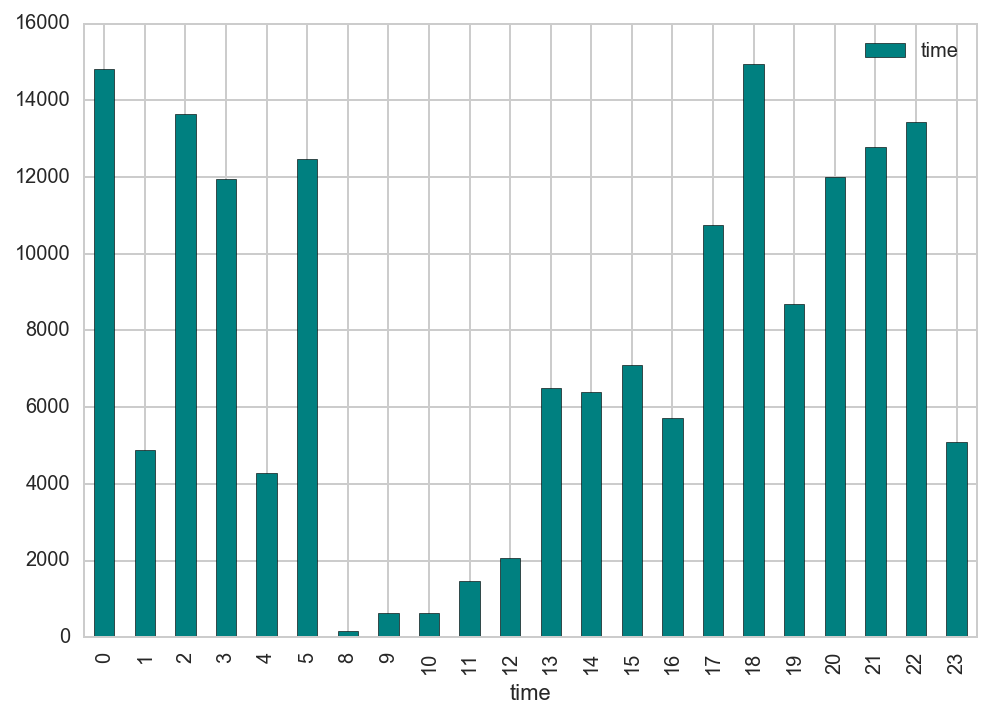

In [70]:
hour_count.plot(kind='bar',color='teal')

In [44]:
df_time['time'] = pd.to_datetime(df_time['time'])
df_time = df_time.set_index(['time'])
min_count = pd.DataFrame(df_time.groupby(pd.TimeGrouper("15Min")).size())

,0
time,
2016-07-11 01:30:00,110
2016-07-11 01:45:00,376
2016-07-11 02:00:00,307
2016-07-11 02:15:00,349
2016-07-11 02:30:00,349


In [60]:
min_count.columns = ['count']
min_count.head()

,count
time,
2016-07-11 01:30:00,110
2016-07-11 01:45:00,376
2016-07-11 02:00:00,307
2016-07-11 02:15:00,349
2016-07-11 02:30:00,349


In [66]:
min_count.ix[(min_count['count'] > 4000)]
#min_count['count'][0]

,count
time,
2016-07-11 20:00:00,4235
2016-07-11 22:30:00,4335
2016-07-12 00:00:00,4297
2016-07-12 02:15:00,4300
2016-07-12 03:45:00,4219
2016-07-12 13:30:00,4099
2016-07-12 15:00:00,4417
2016-07-12 21:30:00,4182
2016-07-14 00:30:00,4013


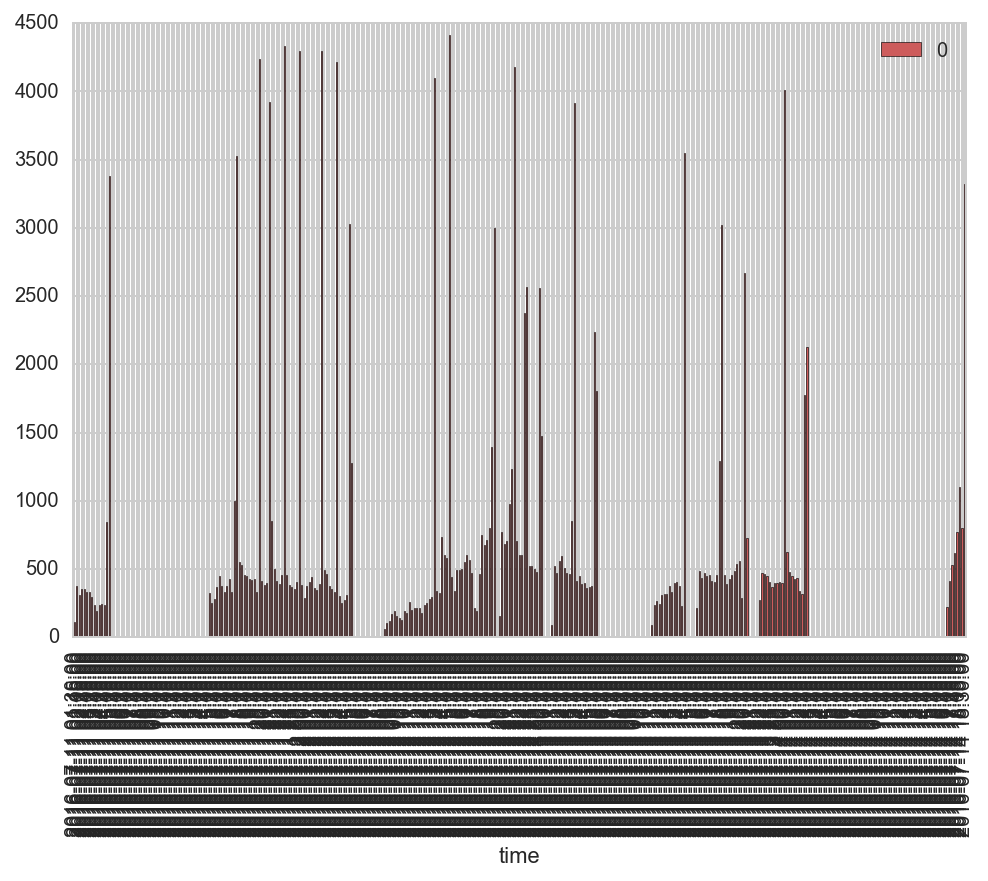

In [46]:
min_count.plot(kind='bar', color='indianred')

In [29]:
date_count = pd.DataFrame(pd.groupby(df_time, by=df_time.time.dt.date).count())
date_count

,time
time,
2016-07-11,37649
2016-07-12,68349
2016-07-13,44964
2016-07-14,19536
